In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import random
from itertools import product
import plotly.graph_objects as go

from joblib import load

In [2]:
df = load('./convergence_results_Banerjee.joblib')

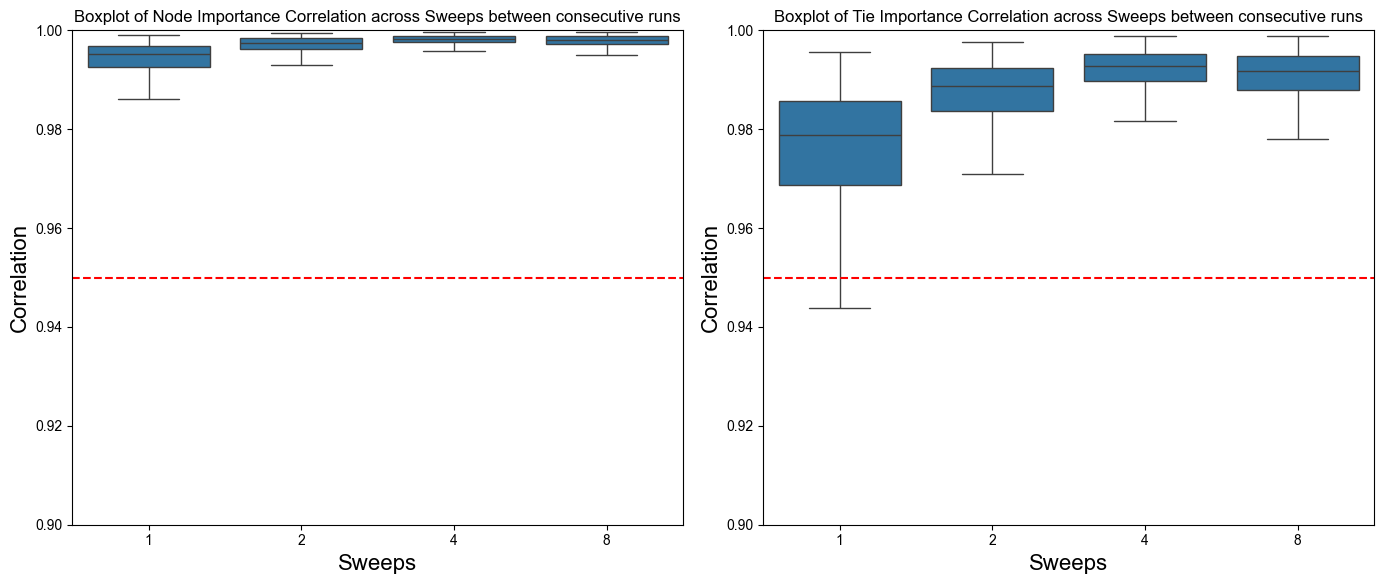

In [3]:
# Figure 15

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Apply seaborn styling
sns.set(style="whitegrid")

# Create the first boxplot for node correlation
sns.boxplot(x='sweeps', y='node_corr', data=df, ax=axes[0], showfliers=False)
axes[0].set_xlabel('Sweeps', fontsize=16)
axes[0].set_ylabel('Correlation', fontsize=16)
axes[0].set_title('Boxplot of Node Importance Correlation across Sweeps between consecutive runs')
axes[0].axhline(y=0.95, color='red', linestyle='--')  # Add horizontal red line
axes[0].set_ylim(0.9, 1)  # Set y-axis limits

# Create the second boxplot for edge correlation
sns.boxplot(x='sweeps', y='edge_corr', data=df, ax=axes[1], showfliers=False)
axes[1].set_xlabel('Sweeps', fontsize=16)
axes[1].set_ylabel('Correlation', fontsize=16)
axes[1].set_title('Boxplot of Tie Importance Correlation across Sweeps between consecutive runs')
axes[1].axhline(y=0.95, color='red', linestyle='--')  # Add horizontal red line
axes[1].set_ylim(0.9, 1)  # Set y-axis limits

# Adjust layout
plt.tight_layout()

plt.savefig('boxplot_node_edge_correlation.png', dpi = 300)

In [4]:
# Calculate the absolute difference between 'column1' and 'column2'
df['abs_diff_sym'] = (df['sym1'] - df['sym2']).abs()

# Calculate the average between 'column1' and 'column2'
df['average_sym'] = (df['sym1'] + df['sym2']) / 2

#convert the average_sym to absolute value
df['average_sym'] = df['average_sym'].abs()

df['relative_error'] = df['abs_diff_sym']/df['average_sym']*100

/var/folders/w_/tpd5jlcs0437ct5ghvt_2kqh0000gn/T/ipykernel_83107/2020420325.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sweeps', y='relative_error', data=df, showfliers=False, palette='pastel')


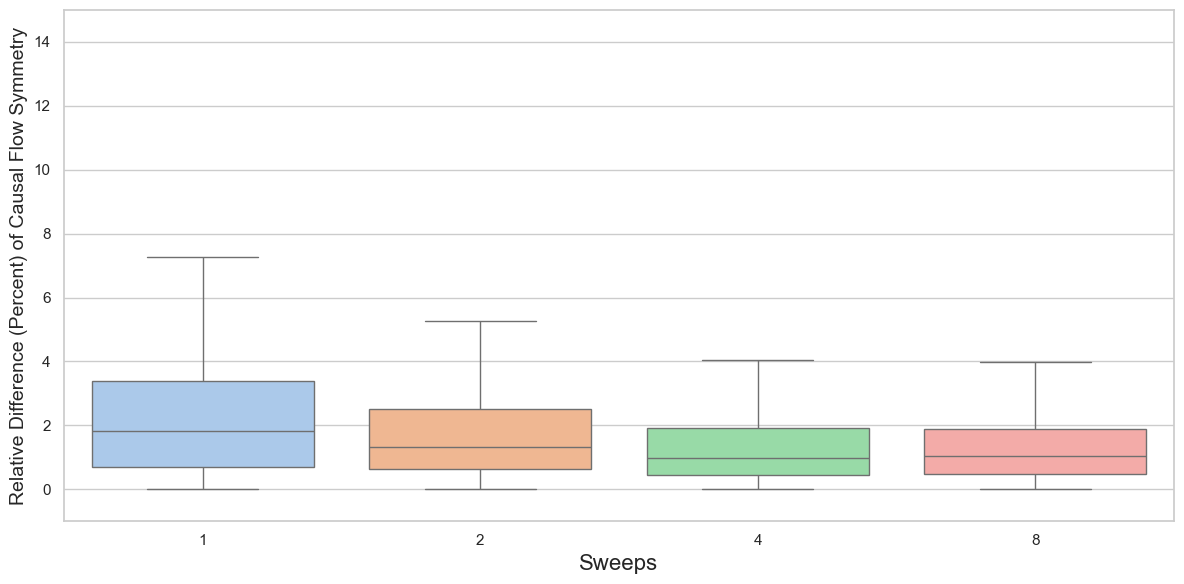

In [5]:
# Figure 16

# Apply seaborn styling
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x='sweeps', y='relative_error', data=df, showfliers=False, palette='pastel')

# Optional: Overlay with raw data
#sns.stripplot(x='sweeps', y='relative_error', data=df, color='black', alpha=0.3, jitter=True)

plt.xlabel('Sweeps', fontsize=16)
plt.ylabel('Relative Difference (Percent) of Causal Flow Symmetry', fontsize=14)
plt.ylim(-1, 15)
plt.tight_layout()

plt.savefig('boxplot_relative_diff_symmetry.png', dpi=300)
plt.show()


In [6]:
df['number_of_nodes'] = df['number_of_nodes'].astype(int)
df['num_nodes_group'], bin_edges = pd.cut(
    df['number_of_nodes'],
    bins=5,
    labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'],
    retbins=True
)

print("Bin edges:", bin_edges)

Bin edges: [ 344.606  624.8    903.6   1182.4   1461.2   1740.   ]


/var/folders/w_/tpd5jlcs0437ct5ghvt_2kqh0000gn/T/ipykernel_83107/1637929596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num_nodes_group', y='abs_diff_sym', data=df, palette="Set2", width=0.6, showfliers=False)


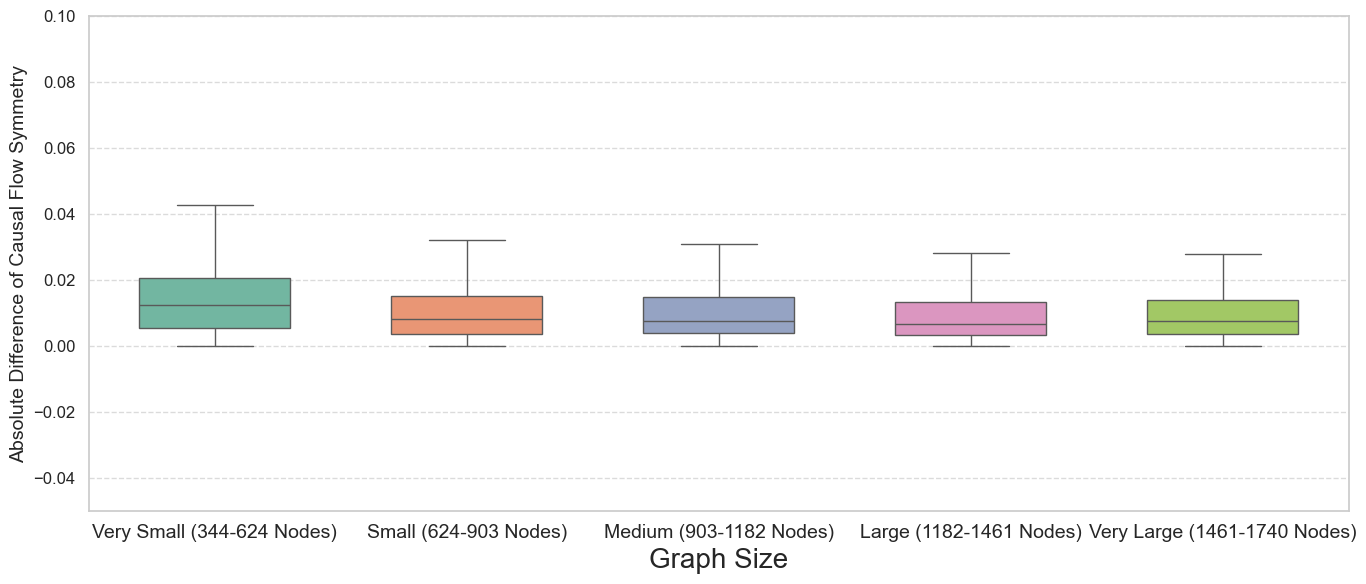

In [7]:
# Figure 17

# Make the boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(x='num_nodes_group', y='abs_diff_sym', data=df, palette="Set2", width=0.6, showfliers=False)

# Optional: Add jittered dots
# sns.stripplot(x='num_nodes_group', y='abs_diff_sym', data=df, color="black", alpha=0.6, jitter=0.2, size=3)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set the custom x-tick labels with bin ranges
xtick_labels = [
    f'{label} ({int(bin_edges[i])}-{int(bin_edges[i+1])} Nodes)'
    for i, label in enumerate(['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])
]
plt.xticks(ticks=np.arange(5), labels=xtick_labels, rotation=0, fontsize=14)

# Labels and title
plt.xlabel('Graph Size', fontsize=20)
plt.ylabel('Absolute Difference of Causal Flow Symmetry', fontsize=14)
#plt.title('Boxplot of Absolute Difference between Symmetry values across Number of Nodes Groups', fontsize=16)
plt.ylim(-0.05, 0.1)

# Y-tick formatting
plt.yticks(fontsize=12)

# Save and show
plt.tight_layout()
plt.savefig('boxplot_abs_diff_symmetry_grouped.png', dpi=300)
plt.show()
